In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('../train.tsv', sep='\t')
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


## Cleaning the Data

In [3]:
print data.isnull().sum() # check for nulls
        
print len(data[data.Phrase==""])

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64
0


## Comparing Sentiment Histograms

This section looks at the spread of sentiment across all the phrases, using the given sentiment scores and comparing them to the sentiment score for each phrase from the pattern sentiment toolkit and the indico sentiment toolkit.  It makes columns to represent the sentiment scores for each phrase from each toolkit, then plots all the histograms to compare the spread of scores

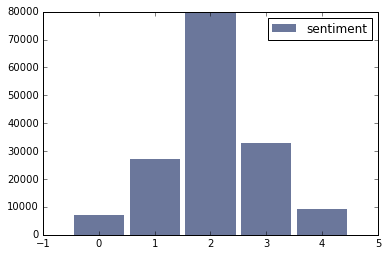

In [4]:
from pattern.en import *
import thinkstats2
import thinkplot
%matplotlib inline

# First, let's just examine the actual sentiment distribution
hist = thinkstats2.Hist(data.Sentiment)
thinkplot.Hist(hist, label='sentiment')
thinkplot.Show()

### Pattern Sentiment
This function called get_map_pattern gets the pattern sentiment for a given phrase and remaps it to the same interval as the original data.  Pattern sentiment returns a value from -1 to 1, and we want our sentiment to be an integer from 0 to 4.  We use np.digitize to sort the score into a bin.  The arrangement of the bins is currently evenly distributed, but depending on how pattern sentiment works, it might make sense to shift the bins around so they better match the original data spread.

We then use a lambda function to create a new column in our dataframe for the pattern sentiment scores

In [5]:
def get_map_pattern(phrase):
    pos_neg, obj_subj = sentiment(phrase) #pos_neg on scale -1 to 1
    bins = np.array([-1.0, -0.6, -0.2, 0.2, 0.6, 1.01])
    binplace = np.digitize(pos_neg, bins)-1
    return binplace

data['PatternSentiment'] = data["Phrase"].apply(lambda x: get_map_pattern(x))
print data.PatternSentiment

0         3
1         4
2         2
3         2
4         2
5         4
6         2
7         4
8         2
9         4
10        2
11        2
12        2
13        2
14        2
15        4
16        2
17        4
18        2
19        4
20        2
21        4
22        4
23        2
24        2
25        2
26        2
27        3
28        3
29        2
         ..
156030    2
156031    2
156032    2
156033    2
156034    2
156035    2
156036    2
156037    2
156038    2
156039    2
156040    2
156041    2
156042    2
156043    2
156044    2
156045    2
156046    2
156047    2
156048    1
156049    2
156050    2
156051    2
156052    2
156053    1
156054    1
156055    2
156056    1
156057    2
156058    2
156059    2
Name: PatternSentiment, dtype: int64


### indico Sentiment
Very similar to the way we calculated pattern sentiment, we use the indico library to calculate the sentiment of each phrase.  The indico toolkit returns a value from 0 to 1, so we again use numpy to bin these so they are an integer from 0 to 4.  The function takes a LOT longer than the pattern one to run, fpr some reason

In [6]:
# import indicoio
# indicoio.config.api_key = '3cf95c9cd8495a83396e1a3b345de2f0'
# #print indicoio.sentiment_hq("")

# def get_map_indico(phrase):
#     try:
#         pos_neg = indicoio.sentiment_hq(phrase)
#         bins = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.01])
#         binplace = np.digitize(pos_neg, bins)-1
#         return binplace
#     except:
#         return 2
#         # I DON'T KNOW WHY ITS NOT WORKING SOMETIMES!!!

# data['IndicoSentiment'] = data["Phrase"].apply(lambda x: get_map_indico(x))
# print data.IndicoSentiment

Update on indico use: I think we're not going to use it, and instead stick to pattern for any sentiment analysis we might need.  This section took ages to run and actually used up all my credit for indico API calls for the month.

## How Good is the Pattern Sentiment?

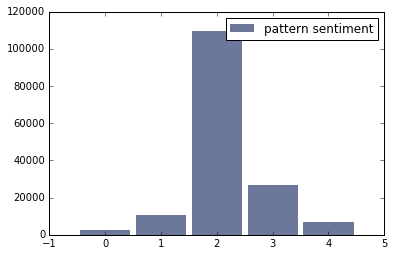

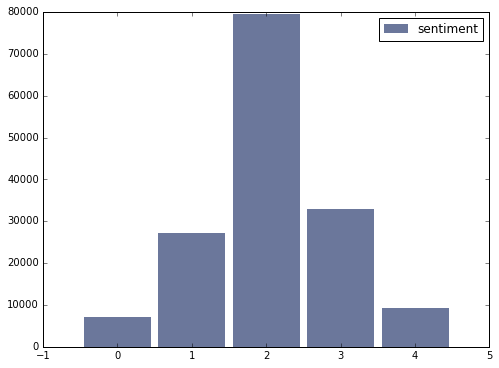

In [7]:
hist = thinkstats2.Hist(data.PatternSentiment)
thinkplot.Hist(hist, label='pattern sentiment')
thinkplot.Show()

hist = thinkstats2.Hist(data.Sentiment)
thinkplot.Hist(hist, label='sentiment')
thinkplot.Show()

The histograms show the distribution of sentiment scores for each phrase.  It looks like the pattern sentiment scores made a lot more middle-of-the-road judgements, and a lot fewer on the ends of the spectrum.  This doesn't tell much about its actual accuracy, just the general spread of judgements.  We could also change the binning numbers for the pattern values to make it closer to the actual values.

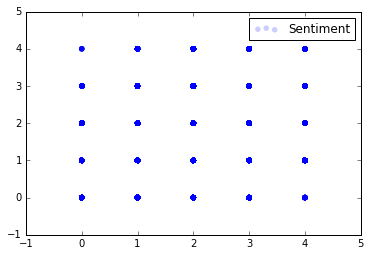

In [8]:
thinkplot.Scatter(data.PatternSentiment, data.Sentiment)
thinkplot.Show()

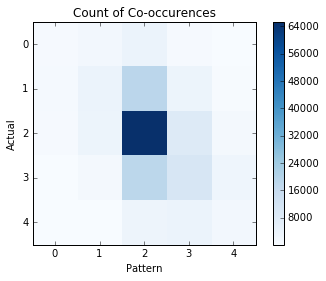

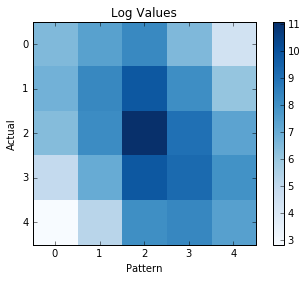

In [9]:
import matplotlib as mpl
from matplotlib import pyplot as plt

# make values from -5 to 5, for this example
zvals = np.ones([5,5])
zvalslog = np.ones([5,5])

for i in range(5):
    for j in range(5):
        zvalslog[i][j] = np.log(len(data.Sentiment[data.Sentiment==i][data.PatternSentiment==j]))
        zvals[i][j] = len(data.Sentiment[data.Sentiment==i][data.PatternSentiment==j])

plt.imshow(zvals, interpolation='nearest', cmap=plt.get_cmap("Blues"))
plt.colorbar()
plt.title("Count of Co-occurences")
plt.xlabel("Pattern")
plt.ylabel("Actual")
plt.show()

plt.imshow(zvalslog, interpolation='nearest', cmap=plt.get_cmap("Blues"))
plt.colorbar()
plt.title("Log Values")
plt.xlabel("Pattern")
plt.ylabel("Actual")
plt.show()

These plots show the co-occurence tables of the pattern sentiment predictions compared to the actual ones.  Ideally, it would be a perfect negative slope (all lining up along the diagonal), but we can see that it's actually a lot more spread out and inaccurate.

## Does Subjectivity/Objectivity influence sentiment?

In [10]:
data['PatternSubjObj'] = data["Phrase"].apply(lambda x: sentiment(x)[1])
print data.PatternSubjObj

0         0.381250
1         0.600000
2         0.000000
3         0.000000
4         0.000000
5         0.600000
6         0.000000
7         0.600000
8         0.000000
9         0.600000
10        0.000000
11        0.000000
12        0.000000
13        0.000000
14        0.000000
15        0.600000
16        0.000000
17        0.600000
18        0.000000
19        0.600000
20        0.000000
21        0.600000
22        0.600000
23        0.000000
24        0.000000
25        0.000000
26        0.000000
27        0.308333
28        0.308333
29        0.000000
            ...   
156030    0.000000
156031    0.000000
156032    0.000000
156033    0.000000
156034    0.000000
156035    0.000000
156036    0.000000
156037    0.000000
156038    0.000000
156039    0.177778
156040    0.177778
156041    0.177778
156042    0.000000
156043    0.000000
156044    0.266667
156045    0.266667
156046    0.000000
156047    0.266667
156048    0.200000
156049    0.000000
156050    0.000000
156051    0.

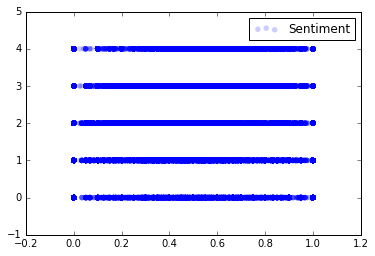

In [11]:
thinkplot.Scatter(data.PatternSubjObj, data.Sentiment)
thinkplot.Show()

In [12]:
data.groupby(data.PatternSentiment).mean()

,PhraseId,SentenceId,Sentiment,PatternSentiment,PatternSubjObj
PatternSentiment,,,,,
0,81545.876215,4269.299113,1.110689,0,0.864105
1,80445.602162,4215.304921,1.444297,1,0.654914
2,77430.954175,4047.418244,1.985516,2,0.141037
3,78679.344857,4112.127293,2.508912,3,0.591978
4,80173.460897,4197.052287,2.859377,4,0.799921


In [13]:
data.groupby(data.Sentiment).mean()

,PhraseId,SentenceId,PatternSentiment,PatternSubjObj
Sentiment,,,,
0,81035.048784,4241.946126,1.695843,0.444927
1,80495.252447,4216.860265,1.940527,0.344103
2,76527.962441,3997.699090,2.084806,0.185350
3,78409.828378,4098.831597,2.449722,0.404026
4,80052.598197,4189.713448,2.791983,0.556528


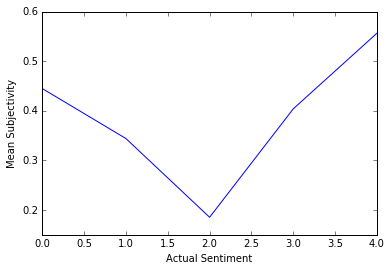

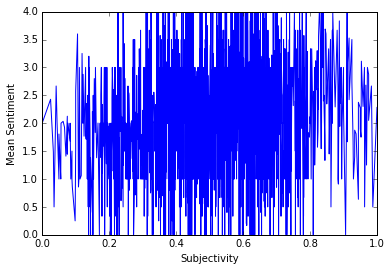

In [14]:
plt.plot(data.groupby(data.Sentiment).mean().PatternSubjObj)
plt.xlabel("Actual Sentiment")
plt.ylabel("Mean Subjectivity")
plt.show()

plt.plot(data.groupby(data.PatternSubjObj).mean().Sentiment)
plt.xlabel("Subjectivity")
plt.ylabel("Mean Sentiment")
plt.show()

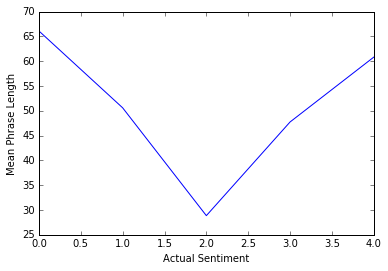

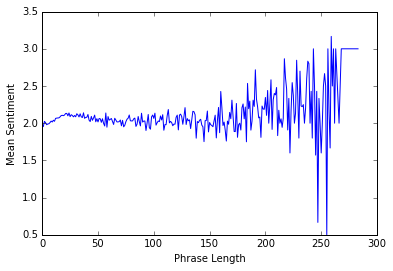

In [15]:
data['PhraseLen'] = data["Phrase"].apply(lambda x: len(x))
plt.plot(data.groupby(data.Sentiment).mean().PhraseLen)
plt.xlabel("Actual Sentiment")
plt.ylabel("Mean Phrase Length")
plt.show()

plt.plot(data.groupby(data.PhraseLen).mean().Sentiment)
plt.xlabel("Phrase Length")
plt.ylabel("Mean Sentiment")
plt.show()

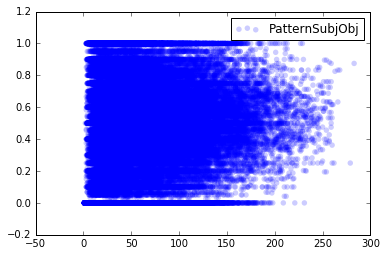

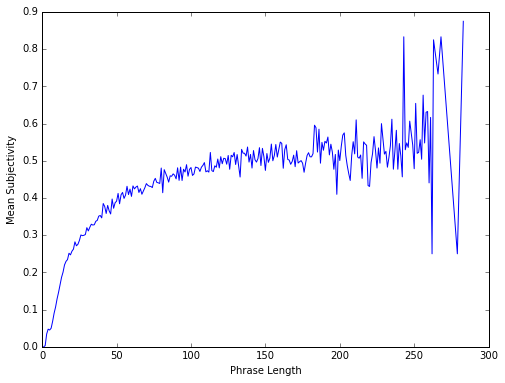

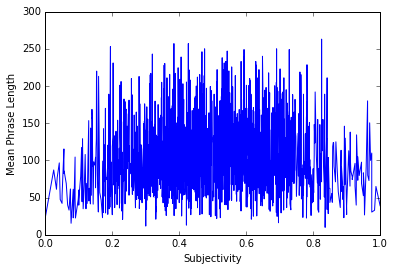

In [16]:
thinkplot.Scatter(data.PhraseLen, data.PatternSubjObj)
thinkplot.show()

plt.plot(data.groupby(data.PhraseLen).mean().PatternSubjObj)
plt.xlabel("Phrase Length")
plt.ylabel("Mean Subjectivity")
plt.show()

plt.plot(data.groupby(data.PatternSubjObj).mean().PhraseLen)
plt.xlabel("Subjectivity")
plt.ylabel("Mean Phrase Length")
plt.show()

## Common Words


I thought it might change the sentiment analysis to get rid of common words from the phrases, so we'd be left with just the "important" words.

In [17]:
freqs = {}
for phrase in data.Phrase:
    for word in phrase.split(" "):
        if word in freqs:
            freqs[word] += 1
        else:
            freqs[word] = 1

In [18]:
common = sorted(freqs.iteritems(), key=lambda (k, v): (-v, k))[:100]
most_common = map(lambda x: x[0], common)
print most_common

['the', ',', 'a', 'of', 'and', 'to', '.', "'s", 'in', 'is', 'that', 'it', 'as', 'with', 'for', 'its', 'film', 'an', 'movie', 'this', 'but', 'be', 'on', 'The', 'you', "n't", 'by', 'more', 'his', 'about', 'at', 'or', 'than', 'from', 'not', '--', 'one', 'have', 'are', 'all', "'", 'like', 'has', 'A', 'so', 'story', '-RRB-', 'who', 'out', 'most', 'into', '-LRB-', 'up', 'too', 'good', '`', 'their', '...', 'characters', '``', "''", 'much', 'I', 'can', 'your', 'comedy', 'if', 'no', 'just', 'does', 'what', 'some', 'time', 'will', 'funny', 'way', 'little', 'even', 'any', 'life', 'very', 'been', 'make', 'only', 'which', 'movies', 'It', 'he', 'enough', 'work', 'us', 'was', 'her', 'own', 'do', 'other', 'they', 'bad', 'something', 'would']


This calculates the 100 most commonly used words in the training set

In [19]:
def remove_common_words(phrase):
    uncommons = []
    for word in phrase.split(" "):
        if word in most_common:
            uncommons.append(word)
    return " ".join(uncommons)

data['PhrasesNoCommon'] = data["Phrase"].apply(lambda x: remove_common_words(x))
print data.PhrasesNoCommon

0         A of the that what is good for the is good for...
1                        A of the that what is good for the
2                                                         A
3                                                         A
4                                                          
5                          of the that what is good for the
6                                                        of
7                             the that what is good for the
8                                                          
9                             the that what is good for the
10                                                      the
11                                                         
12                                                      the
13                                                      the
14                                                         
15                                that what is good for the
16                                      

In [20]:
data['PatternSentimentNoCommon'] = data["PhrasesNoCommon"].apply(lambda x: get_map_pattern(x))
data.groupby(data.Sentiment).mean()

,PhraseId,SentenceId,Sentiment,PatternSentiment,PatternSubjObj,PhraseLen,PatternSentimentNoCommon
Sentiment,,,,,,,
0,81035.048784,4241.946126,0,1.695843,0.444927,66.092336,2.000141
1,80495.252447,4216.860265,1,1.940527,0.344103,50.602281,2.070473
2,76527.962441,3997.699090,2,2.084806,0.185350,28.861929,2.051481
3,78409.828378,4098.831597,3,2.449722,0.404026,47.743402,2.134388
4,80052.598197,4189.713448,4,2.791983,0.556528,60.817076,2.180426


I created a new column "PhrasesNoCommon" that is the phrase with the top-100 common words removed.  Then, I made a column for the pattern sentiment of these phrases.  Comparing the pattern sentiment of the no-common phrases to the typical pattern sentiment, you can see pattern was much more likely to stay around the neutral level.  This makes  a lot of sense - the phrases probably ended up as gibberish after I removed all the common words, and however pattern determines sentiment probably depended on sentence structure.  Overall, this wasn't very helpful

## Playing with NLTK

In [21]:
import nltk
#nltk.download() #only first time running
sentence = "A series of escapades demonstrating the adage that what is good for the goose is also good for the gander"
tokens = nltk.word_tokenize(sentence)
print tokens
tagged = nltk.pos_tag(tokens)
print tagged

entities = nltk.chunk.ne_chunk(tagged)
print entities

['A', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander']
[('A', 'DT'), ('series', 'NN'), ('of', 'IN'), ('escapades', 'NNS'), ('demonstrating', 'VBG'), ('the', 'DT'), ('adage', 'NN'), ('that', 'IN'), ('what', 'WP'), ('is', 'VBZ'), ('good', 'JJ'), ('for', 'IN'), ('the', 'DT'), ('goose', 'NN'), ('is', 'VBZ'), ('also', 'RB'), ('good', 'JJ'), ('for', 'IN'), ('the', 'DT'), ('gander', 'NN')]
(S
  A/DT
  series/NN
  of/IN
  escapades/NNS
  demonstrating/VBG
  the/DT
  adage/NN
  that/IN
  what/WP
  is/VBZ
  good/JJ
  for/IN
  the/DT
  goose/NN
  is/VBZ
  also/RB
  good/JJ
  for/IN
  the/DT
  gander/NN)


In [22]:
from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

In [23]:
import random
# code copied from nltk book, chpater 6 - just to play with it and see what it does
# we don't want to make a model yet, only exploration
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category) for category in movie_reviews.categories() for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [24]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features
print(document_features(movie_reviews.words('pos/cv957_8737.txt'))) 

{'contains(corporate)': False, 'contains(barred)': False, 'contains(batmans)': False, 'contains(menacing)': False, 'contains(rags)': False, 'contains(inquires)': False, 'contains(nosebleeding)': False, 'contains(playhouse)': False, 'contains(peculiarities)': False, 'contains(kilgore)': False, 'contains(tarnish)': False, 'contains(sand)': False, 'contains(busting)': False, 'contains(wedge)': False, 'contains(smelling)': False, 'contains(tulip)': False, 'contains(singled)': False, 'contains(wahlberg)': False, 'contains(needed)': False, 'contains(lydia)': False, 'contains(rick)': False, 'contains(cambodia)': False, 'contains(outfielders)': False, 'contains(jovivich)': False, 'contains(pinon)': False, 'contains(fix)': False, 'contains(marla)': False, 'contains(resources)': False, 'contains(nomi)': False, 'contains(irs)': False, 'contains(mason)': False, 'contains(vicariously)': False, 'contains(ingrained)': False, 'contains(skepticism)': False, 'contains(tested)': False, 'contains(spat)': 

In [25]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))
classifier.show_most_informative_features(5)

0.67
Most Informative Features
          contains(sans) = True              neg : pos    =      9.0 : 1.0
  contains(effortlessly) = True              pos : neg    =      7.4 : 1.0
    contains(mediocrity) = True              neg : pos    =      7.0 : 1.0
     contains(dismissed) = True              pos : neg    =      7.0 : 1.0
   contains(bruckheimer) = True              neg : pos    =      6.4 : 1.0


### Part of Speech Sentiment?

Since we can use NLTK to classify parts of speech, maybe looking at the parts of speech of words can give insight into their sentiment and subjectivity.  This pulls out all the phrases that are just one-word long and creates a new dataframe for them, and calculates their part of speech.

In [26]:
def num_words(phrase):
    return len(phrase.split(" "))

data['PhraseNumWords'] = data["Phrase"].apply(lambda x: num_words(x))

In [27]:
single_words = data[data.PhraseNumWords==1]
print single_words

        PhraseId  SentenceId          Phrase  Sentiment  PatternSentiment  \
3              4           1               A          2                 2   
4              5           1          series          2                 2   
6              7           1              of          2                 2   
8              9           1       escapades          2                 2   
11            12           1   demonstrating          2                 2   
13            14           1             the          2                 2   
14            15           1           adage          2                 2   
16            17           1            that          2                 2   
18            19           1            what          2                 2   
20            21           1              is          2                 2   
22            23           1            good          3                 4   
24            25           1             for          2                 2   

In [28]:
tagged_singles = [x[1] for x in nltk.pos_tag(single_words.Phrase)]
#print tagged_singles
single_words['POS'] = tagged_singles
print single_words

        PhraseId  SentenceId          Phrase  Sentiment  PatternSentiment  \
3              4           1               A          2                 2   
4              5           1          series          2                 2   
6              7           1              of          2                 2   
8              9           1       escapades          2                 2   
11            12           1   demonstrating          2                 2   
13            14           1             the          2                 2   
14            15           1           adage          2                 2   
16            17           1            that          2                 2   
18            19           1            what          2                 2   
20            21           1              is          2                 2   
22            23           1            good          3                 4   
24            25           1             for          2                 2   

/home/anne/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Uncomment the below line to print the key for the part of speech tags

In [29]:
#nltk.help.upenn_tagset()


AttributeError: 'DataFrame' object has no attribute 's'

From this, we can call out JJR and RB for their subjectivity scores.  JJR is comparative adjectives and RB is adverbs, and both scored relatively high on subjectivity, which makes a lot of sense.  If you're saying "better" or "nicer" or something similar, it's pretty subjective.  I'm surprised that JJS (superlative adjectives) scored lower than JJR on subjectivity.  Also, most words scored around neutral on sentiment, except for WDT, which is a WH-determiner like "which" or "whichever".

### Adjectives and Sentiment?

Based on that analysis, I was hoping to count the number of adjectives in each phrase and compare it to the sentiment.  However, this code has been taking ages to run, for some reason, so it looks like this isn't super feasible

In [31]:
def adj_count(phrase):
    tokens = nltk.word_tokenize(phrase)
    tagged = nltk.pos_tag(tokens)
    adj_count = 0
    for word, pos in tagged:
        if pos[:2] == "JJ":
            adj_count+=1
    return adj_count

data['AdjCount'] = data["Phrase"].apply(lambda x: adj_count(x))

KeyboardInterrupt: 

In [ ]:
data.groupby(data.Sentiment).mean()

In [ ]:
hist = thinkstats2.Hist(data.AdjCount)
thinkplot.Hist(hist, label='sentiment')
thinkplot.Show()

thinkplot.Scatter(data.AdjCount, data.Sentiment)
thinkplot.Show()